In [87]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

from moviepy.editor import VideoFileClip
from moviepy.editor import ipython_display

import numpy as np
import pandas as pd

from IPython.display import Audio

In [123]:
## Load and display the video
video_path = "data/video_data/498ynMnZ6Lo_30000/video.mp4"

video = VideoFileClip(video_path)

video.ipython_display(width=280, height=320)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [124]:
# Store the audio in a temporary 
audio = video.audio

audio.ipython_display()

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.


**MelSpectogram**

MoviePy - Writing audio in temp_audio_2.wav


MoviePy - Done.


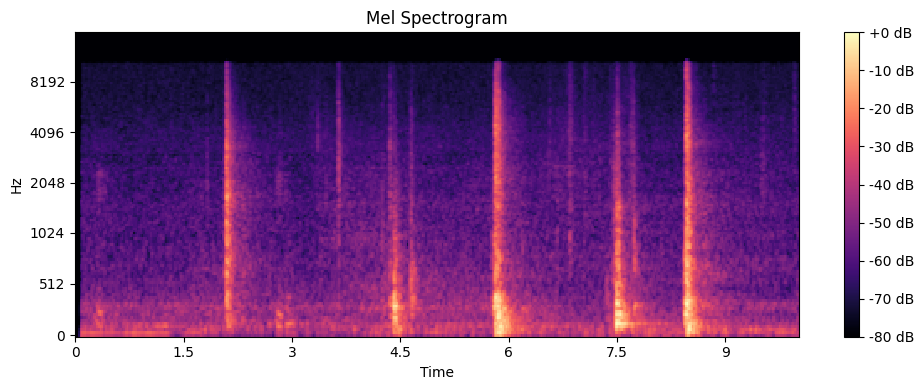

In [125]:
def display_melspectogram(y, sr):
    # Create the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=16000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=16000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# Extract audio to a temporary WAV file (required for processing with librosa)
audio_file = 'temp_audio_2.wav'
audio.write_audiofile(audio_file, codec='pcm_s16le')
samples, sample_rate = librosa.load(audio_file)

display_melspectogram(samples, sample_rate)

MoviePy - Writing audio in temp_audio_sr.wav


MoviePy - Done.


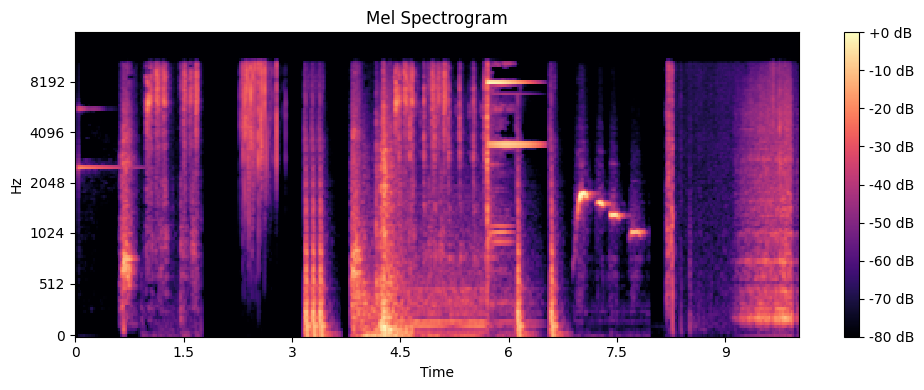

In [115]:
def display_melspectogram(y, sr):
    # Create the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=16000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=16000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# Extract audio to a temporary WAV file (required for processing with librosa)
audio_file = 'temp_audio_sr.wav'
audio.write_audiofile(audio_file, codec='pcm_s16le')
samples, sample_rate = librosa.load(audio_file)

display_melspectogram(samples, sample_rate)

In [126]:
sample_rate

22050

In [94]:
## Saving (just) the melspectogram as an image
plt.imsave('mel_spectrogram_simple.png', S_DB, cmap='inferno', format='png')

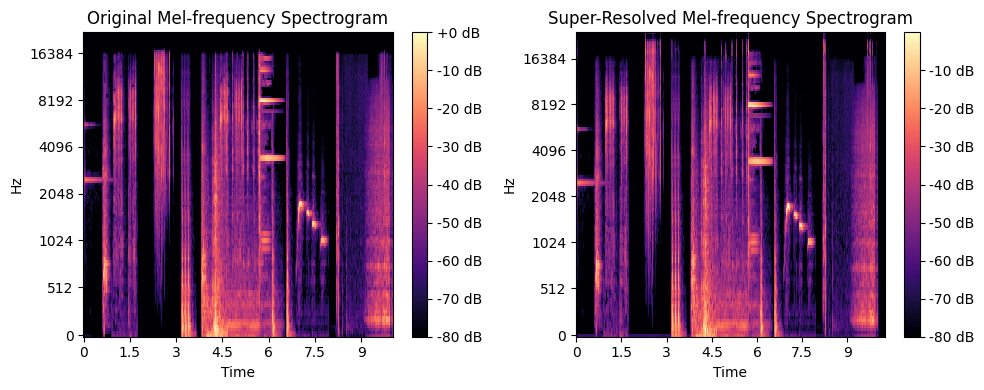

In [117]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the original and super-resolved audio files
y_original, sr_original = librosa.load('temp_audio.wav', sr=None)
y_super_resolved, sr_super_resolved = librosa.load('temp_audio_sr.wav', sr=None)

# Compute the mel spectrogram for the original audio
mel_spec_original = librosa.feature.melspectrogram(y=y_original, sr=sr_original, n_mels=128)
mel_spec_original_dB = librosa.power_to_db(mel_spec_original, ref=np.max)

# Compute the mel spectrogram for the super-resolved audio
mel_spec_super_resolved = librosa.feature.melspectrogram(y=y_super_resolved, sr=sr_super_resolved, n_mels=128)
mel_spec_super_resolved_dB = librosa.power_to_db(mel_spec_super_resolved, ref=np.max)

# Plot the original mel spectrogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(mel_spec_original_dB, x_axis='time', y_axis='mel', sr=sr_original)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel-frequency Spectrogram')

# Plot the super-resolved mel spectrogram
plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spec_super_resolved_dB, x_axis='time', y_axis='mel', sr=sr_super_resolved)
plt.colorbar(format='%+2.0f dB')
plt.title('Super-Resolved Mel-frequency Spectrogram')

plt.tight_layout()
plt.show()

In [128]:
sr_super_resolved

48000

In [130]:
sr_original

44100

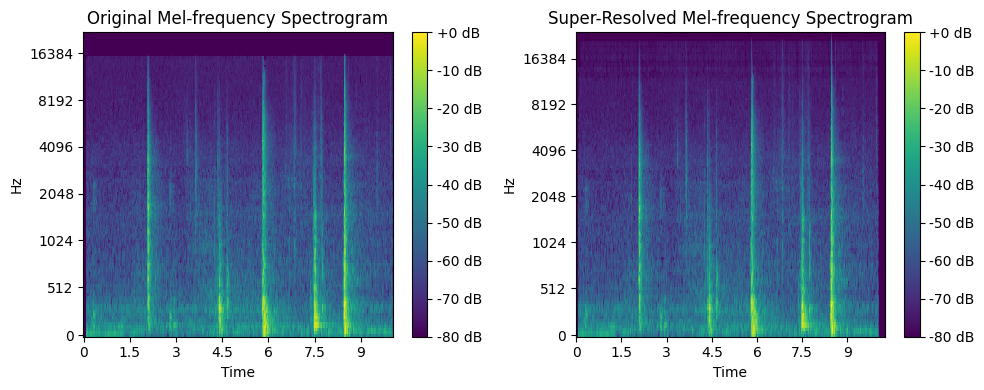

In [127]:
n_fft = 2048 # Window size for FFT, adjust as needed
hop_length = 512 # Distance between successive frames, adjust as needed

y_original, sr_original = librosa.load('temp_audio_2.wav', sr=None)
y_super_resolved, sr_super_resolved = librosa.load('temp_audio_2_sr.wav', sr=None)

# Compute the mel spectrogram for the original audio
mel_spec_original = librosa.feature.melspectrogram(y=y_original, sr=sr_original, n_mels=128)
mel_spec_original_dB = librosa.power_to_db(mel_spec_original, ref=np.max)

# Compute the mel spectrogram for the super-resolved audio
mel_spec_super_resolved = librosa.feature.melspectrogram(y=y_super_resolved, sr=sr_super_resolved, n_mels=128)
mel_spec_super_resolved_dB = librosa.power_to_db(mel_spec_super_resolved, ref=np.max)

# Now let's plot again with some additional parameters
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
librosa.display.specshow(mel_spec_original_dB, sr=sr_original, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel-frequency Spectrogram')

plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spec_super_resolved_dB, sr=sr_super_resolved, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Super-Resolved Mel-frequency Spectrogram')

plt.tight_layout()
plt.show()

**Waveform**

In [95]:
def display_waveform(y, sr, x_axis = 'time'):
    
    plt.figure(figsize=(14, 5))
    
    if x_axis == 'time':
        duration = len(y) / sr 
        time = np.linspace(0, duration, len(y))
        plt.plot(time, y)
        plt.xlabel('Time (Seconds)')
    else:
        plt.plot(y)
        plt.xlabel('Samples')

    plt.title('Waveform')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.2)
    plt.show()

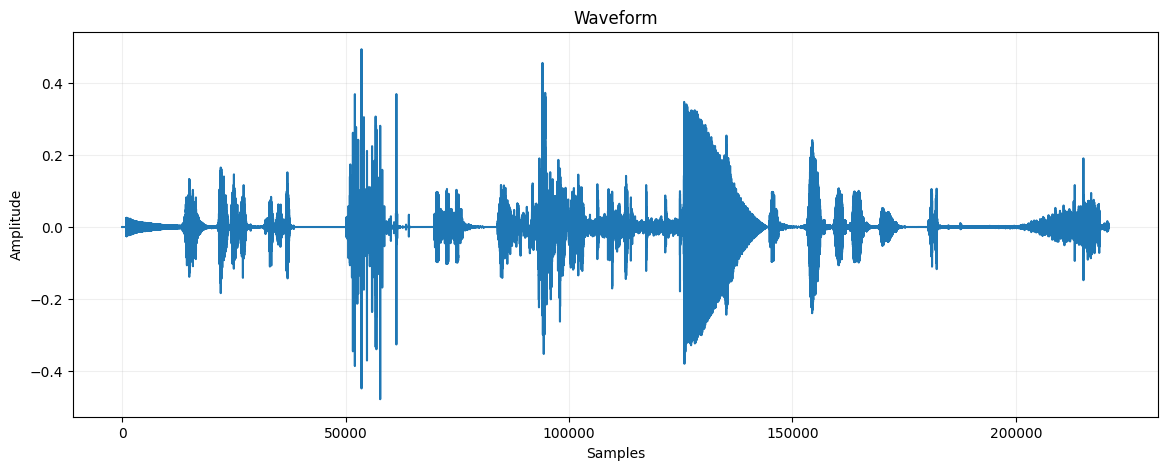

In [96]:
display_waveform(samples, sample_rate, x_axis='samples')

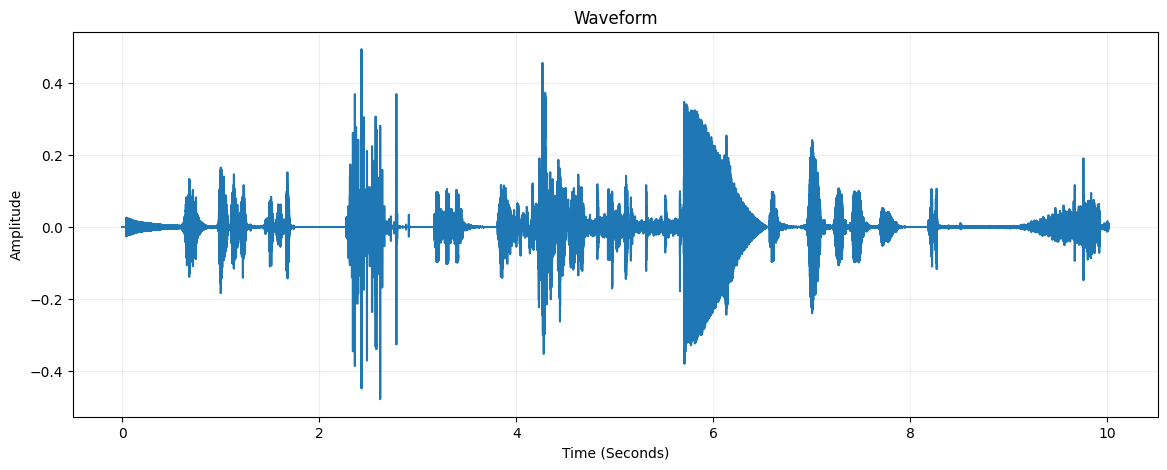

In [97]:
display_waveform(samples, sample_rate, x_axis='time')

**Read the labels**

In [98]:
metadata_df = pd.read_csv('data/video_data/2jpLS2TQjlI_0/metadata.csv')

ontology = pd.read_json('data/ontology.json')
ontology = ontology[['id','name']]

metadata_df = pd.merge(metadata_df, ontology, how='left', left_on = 'label', right_on='id')
metadata_df = metadata_df.drop(columns=['id'])

metadata_df

segment_id  start_time_seconds  end_time_seconds       label  \
0   2jpLS2TQjlI_0               0.039             0.638  /m/07phxs1   
1   2jpLS2TQjlI_0               0.606             0.913  /m/07rqsjt   
2   2jpLS2TQjlI_0               1.000             1.268    /m/081rb   
3   2jpLS2TQjlI_0               1.449             1.748    /m/081rb   
4   2jpLS2TQjlI_0               2.291             2.921  /t/dd00112   
5   2jpLS2TQjlI_0               3.150             3.528    /m/0c1dj   
6   2jpLS2TQjlI_0               3.835             4.150  /m/07rqsjt   
7   2jpLS2TQjlI_0               4.189             4.449    /m/0c1dj   
8   2jpLS2TQjlI_0               4.425             4.756    /m/081rb   
9   2jpLS2TQjlI_0               4.819             5.220    /m/081rb   
10  2jpLS2TQjlI_0               5.701             6.496  /m/07phxs1   
11  2jpLS2TQjlI_0               6.118             6.213    /m/0c1dj   
12  2jpLS2TQjlI_0               6.583             6.709    /m/0c1dj   
13  2jpLS2TQjlI_0               6.961             7.961   /m/01w250   
14  2jpLS2TQjlI_0               8.205             8.299    /m/0c1dj   
15  2jpLS2TQjlI_0               8.331             9.142    /m/02_41   
16  2jpLS2TQjlI_0               9.142            10.000    /m/04rlf   

                     name  
0                    Ding  
1   Whoosh, swoosh, swish  
2                 Writing  
3                 Writing  
4    Crumpling, crinkling  
5            Sound effect  
6   Whoosh, swoosh, swish  
7            Sound effect  
8                 Writing  
9                 Writing  
10                   Ding  
11           Sound effect  
12           Sound effect  
13              Whistling  
14           Sound effect  
15                   Fire  
16                  Music

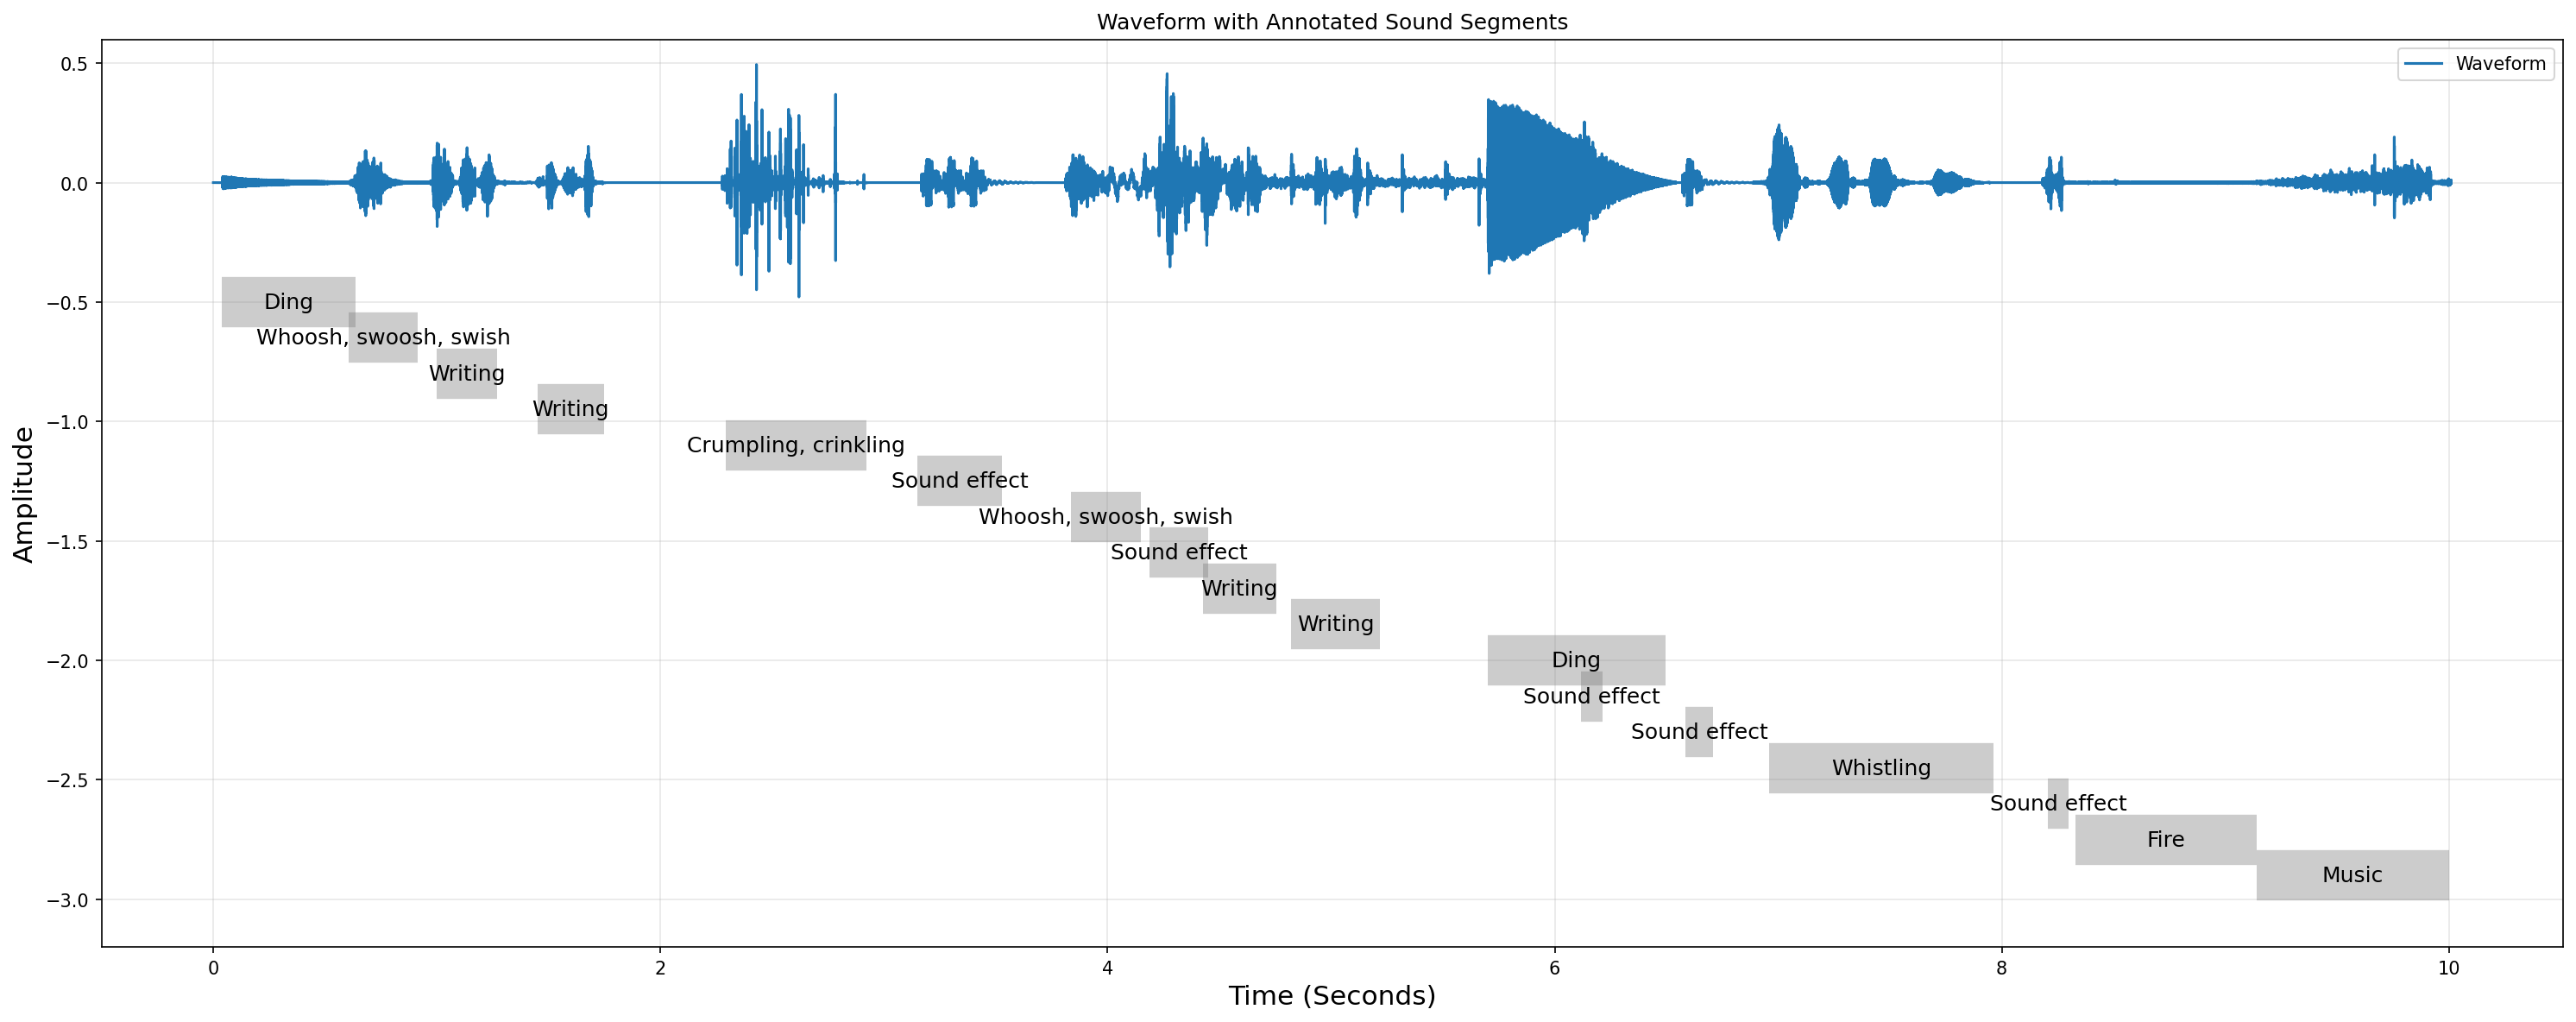

In [99]:
def fancy_plot(y, time):
    fig, ax = plt.subplots(figsize=(20, 8), dpi=150)
    ax.plot(time, y, label='Waveform')
    ax.set_xlabel('Time (Seconds)', fontsize=15)
    ax.set_ylabel('Amplitude', fontsize=15)


    bar_y_position = -0.5
    bar_height = 0.2
    y_pos_increment = -0.15  

    for index, row in metadata_df.iterrows():
        start_time = row['start_time_seconds']
        end_time = row['end_time_seconds']
        label = row['name']
        
        # Adjust y position for each segment
        current_y_pos = bar_y_position + (index * y_pos_increment)

        ax.hlines(current_y_pos, start_time, end_time, colors='grey', lw=28, alpha=0.4) 

        ax.text((start_time + end_time) / 2, current_y_pos, label, ha='center', va='center', fontsize=12, color='black')


    ax.set_ylim(top=0.6, bottom=current_y_pos + 2*y_pos_increment) 

    ax.set_title('Waveform with Annotated Sound Segments')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()


y, sr = librosa.load(audio_file)
duration = len(y) / sr 
time = np.linspace(0, duration, len(y))
fancy_plot(y, time)

In [1]:
from utils.datasets import StronglyLabelledDataset

In [2]:
dataset = StronglyLabelledDataset('train')

In [3]:
dataset

In [5]:
example_datapoint = dataset[0]

c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [6]:
type(example_datapoint)

tuple

In [7]:
len(example_datapoint)

3

In [8]:
for element in example_datapoint:
    print(type(element))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'pandas.core.frame.DataFrame'>
